# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


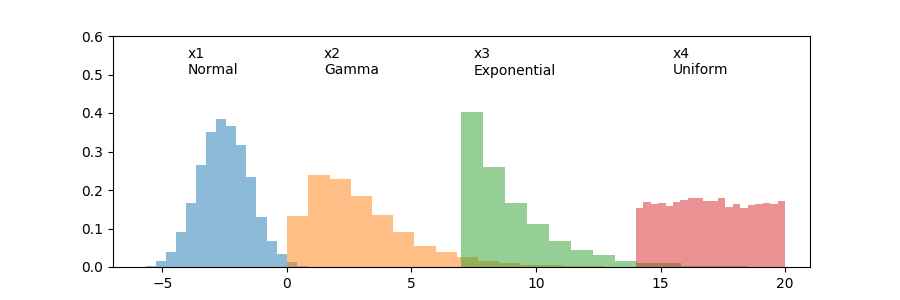

In [11]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


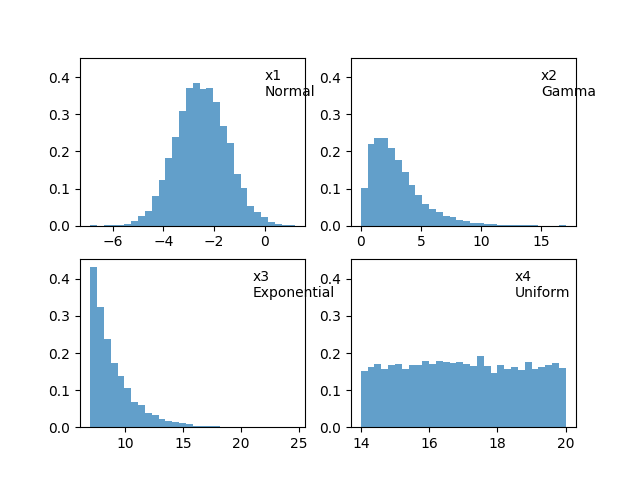

In [12]:
plt.figure()

bins=30
alpha=.7

plt.subplot(2, 2, 1)
ax1 = plt.subplot(2, 2, 1)
plt.hist(x1, normed=True, bins=bins, alpha=alpha)
plt.text(x1.mean()+2.5, 0.35, 'x1\nNormal')

plt.subplot(2, 2, 2, sharey=ax1)
_=plt.hist(x2, normed=True, bins=bins, alpha=alpha)
plt.text(x2.mean()+12, 0.35, 'x2\nGamma')

plt.subplot(2, 2, 3, sharey=ax1)
_=plt.hist(x3, normed=True, bins=bins, alpha=alpha)
plt.text(x3.mean()+12, 0.35, 'x3\nExponential')

plt.subplot(2, 2, 4, sharey=ax1)
_=plt.hist(x4, normed=True, bins=bins, alpha=alpha)
plt.text(x4.mean()+1.5, 0.35, 'x4\nUniform')

<IPython.core.display.Javascript object>


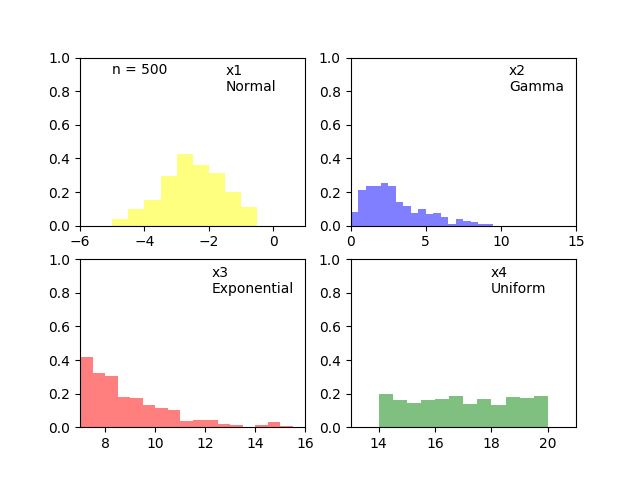

In [21]:

import matplotlib.animation as animation
import matplotlib.gridspec as gridspec

n=500
# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, n)
x2 = np.random.gamma(2, 1.5, n)
x3 = np.random.exponential(2, n)+7
x4 = np.random.uniform(14,20, n)

#plt.figure()
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()

    gspec = gridspec.GridSpec(2, 2)

    ax1 = plt.subplot(gspec[0, 0])
    ax2 = plt.subplot(gspec[0, 1])
    ax3 = plt.subplot(gspec[1, 0])
    ax4 = plt.subplot(gspec[1, 1])
    
    #plt.gca().set_title('n = {}'.format(curr))
       

    bins1 = np.arange(-5, 0, 0.5)
    ax1.hist(x1[:curr], bins=bins1,normed=True, color='yellow', alpha=0.5)
    ax1.axis([-6,1,0,1])
    ax1.text(x1.mean()+1, 0.8, 'x1\nNormal')
    ax1.annotate('n = {}'.format(curr), [-5,0.9])
    
    bins2 = np.arange(0, 10, 0.5)
    ax2.hist(x2[:curr], bins=bins2,normed=True, color='blue',alpha=0.5)
    ax2.axis([0,15,0,1])
    ax2.text(x2.mean()+7.5, 0.8, 'x2\nGamma')
    
    bins3 = np.arange(-1, 20, 0.5)
    ax3.hist(x3[:curr], bins=bins3,normed=True, color='red',alpha=0.5)
    ax3.axis([7,16,0,1])
    plt.text(x3.mean()-1, 0.8, 'x3\nExponential')
    
    bins4 = np.arange(13, 21, 0.5)
    ax4.hist(x4[:curr], bins=bins4,normed=True, color='green',alpha=0.5)
    ax4.axis([13,21,0,1])
    plt.text(x4.mean()+1, 0.8, 'x4\nUniform')
    

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=False)

a = animation.FuncAnimation(fig, update, interval=100)